# Ford GoBike 2008 Investigation

Ford GoBike is a bike-sharing system covering 5 cities. In this project I will be descoviring the greater San Francisco Bay area.<br>
Data analysis had done on year 2008.
The data is provided by [www.fordgobike.com](https://www.fordgobike.com/system-data) and it has 1863721 observations with 16 variables. The reason I chosed this data-set becuase it provide enough observations and variables that can be analysed.<br>
For more exploration I have downloaded weather data-set by [National Centers for Environmental Information](https://www.ncdc.noaa.gov).

In [1]:
# import packages
import pandas as pd 
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
folder = r'data/'
files = glob.glob(folder + '*-fordgobike-tripdata.csv')

dfs = (pd.read_csv(file) for file in files)
df = pd.concat(dfs, ignore_index=True)

In [3]:
df_weather = pd.read_csv('data/weather 2008.csv')
df_weather.head()

,STATION,NAME,DATE,AWND,CDSD,EMNT,EMXT,HDSD,TAVG,TMAX,TMIN,WDF2,WDF5,WDMV,WSF2,WSF5
0,US1CAAL0002,"CASTRO VALLEY 0.5 WSW, CA US",2008-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USR0000CBKD,"BLACK DIAMOND CALIFORNIA, CA US",2008-01,NaN,0.0,33.0,56.0,1866.0,43.4,48.1,38.7,NaN,NaN,NaN,NaN,NaN
2,USR0000CBKD,"BLACK DIAMOND CALIFORNIA, CA US",2008-02,NaN,0.0,35.0,67.0,2331.0,49.0,55.4,42.6,NaN,NaN,NaN,NaN,NaN
3,USR0000CBKD,"BLACK DIAMOND CALIFORNIA, CA US",2008-03,NaN,0.0,35.0,68.0,2743.0,51.7,59.2,44.2,NaN,NaN,NaN,NaN,NaN
4,USR0000CBKD,"BLACK DIAMOND CALIFORNIA, CA US",2008-04,NaN,21.0,34.0,84.0,3076.0,54.1,63.8,44.5,NaN,NaN,NaN,NaN,NaN


In [4]:
df.head(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,72393,2018-04-30 22:49:32.6180,2018-05-01 18:56:06.3010,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,3940,Customer,NaN,NaN,No
1,81034,2018-04-30 17:46:04.9970,2018-05-01 16:16:39.2470,122.0,19th St at Mission St,37.760299,-122.418892,42.0,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,3374,Customer,NaN,NaN,No
2,86142,2018-04-30 16:07:13.9190,2018-05-01 16:02:56.7170,41.0,Golden Gate Ave at Polk St,37.781270,-122.418740,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,3191,Subscriber,1974.0,Male,Yes
3,68839,2018-04-30 17:11:57.4640,2018-05-01 12:19:16.7870,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,115.0,Jackson Playground,37.765026,-122.398773,2970,Customer,1974.0,Female,No
4,59091,2018-04-30 18:45:21.5560,2018-05-01 11:10:13.5410,196.0,Grand Ave at Perkins St,37.808894,-122.256460,233.0,12th St at 4th Ave,37.795812,-122.255555,522,Customer,1965.0,Male,No
5,68093,2018-04-30 15:39:18.3530,2018-05-01 10:34:12.2460,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,1633,Customer,1961.0,Female,No
6,34933,2018-04-30 23:26:14.6610,2018-05-01 09:08:28.5610,71.0,Broderick St at Oak St,37.773063,-122.439078,95.0,Sanchez St at 15th St,37.766219,-122.431060,3928,Customer,NaN,NaN,No
7,55806,2018-04-30 17:04:52.4240,2018-05-01 08:34:58.7360,337.0,Webster St at 19th St,37.806970,-122.266588,193.0,Grand Ave at Santa Clara Ave,37.812744,-122.247215,2713,Customer,1990.0,Male,No
8,32897,2018-04-30 22:49:56.0620,2018-05-01 07:58:13.8920,24.0,Spear St at Folsom St,37.789677,-122.390428,24.0,Spear St at Folsom St,37.789677,-122.390428,2034,Customer,1970.0,Male,No
9,80266,2018-04-30 08:55:57.9900,2018-05-01 07:13:44.7950,339.0,Jackson St at 11th St,37.800002,-122.266438,202.0,Washington St at 8th St,37.800754,-122.274894,3730,Customer,1984.0,Male,No


In [5]:
df.shape

(1863721, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: float64(7), int64(2), object(7)
memory usage: 227.5+ MB


In [7]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.863721e+06,1.753003e+06
mean,8.573026e+02,1.196744e+02,3.776678e+01,-1.223492e+02,1.181730e+02,3.776690e+01,-1.223487e+02,2.296851e+03,1.983088e+03
std,2.370379e+03,1.003976e+02,1.057689e-01,1.654634e-01,1.004403e+02,1.056483e-01,1.650597e-01,1.287733e+03,1.044289e+01
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01,1.881000e+03
25%,3.500000e+02,3.300000e+01,3.777106e+01,-1.224114e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.225000e+03,1.978000e+03
50%,5.560000e+02,8.900000e+01,3.778107e+01,-1.223974e+02,8.800000e+01,3.778127e+01,-1.223971e+02,2.338000e+03,1.985000e+03
75%,8.720000e+02,1.860000e+02,3.779625e+01,-1.222865e+02,1.830000e+02,3.779728e+01,-1.222894e+02,3.333000e+03,1.991000e+03
max,8.636600e+04,3.810000e+02,4.551000e+01,-7.357000e+01,3.810000e+02,4.551000e+01,-7.357000e+01,6.234000e+03,2.000000e+03


In [8]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 16 columns):
STATION    421 non-null object
NAME       421 non-null object
DATE       421 non-null object
AWND       60 non-null float64
CDSD       233 non-null float64
EMNT       328 non-null float64
EMXT       314 non-null float64
HDSD       253 non-null float64
TAVG       307 non-null float64
TMAX       314 non-null float64
TMIN       328 non-null float64
WDF2       60 non-null float64
WDF5       58 non-null float64
WDMV       0 non-null float64
WSF2       60 non-null float64
WSF5       58 non-null float64
dtypes: float64(13), object(3)
memory usage: 52.7+ KB


In [9]:
# use only SAN FRANCISCO DOWNTOWN station
df_weather = df_weather[df_weather.NAME == 'SAN FRANCISCO DOWNTOWN, CA US']

_ , df_weather['MONTH'] = df_weather['DATE'].str.split('-').str

In [10]:
# converting start_time to be datatime object
df.start_time = pd.to_datetime(df.start_time)

## When are most trips taken in terms of time of day, day of the week, or month of the year?

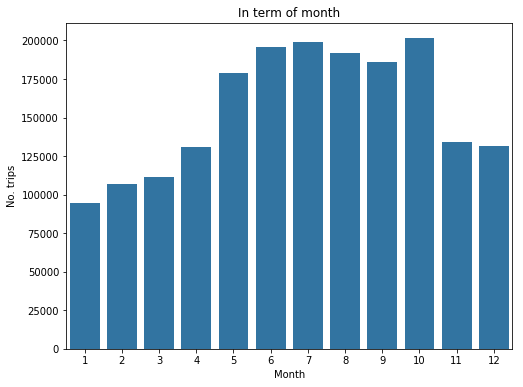

In [11]:
base_color = sns.color_palette()[0]

plt.figure(figsize=(8,6))
sns.countplot(df.start_time.dt.month, color=base_color);
plt.title('In term of month')
plt.xlabel('Month')
plt.ylabel('No. trips');

it looks like there is a peak from may to Nov. I think there is a wather relation with this.
let's use a dataset I downloded from 'National Centers for Environmental Information'. let's plot the temprature each month.

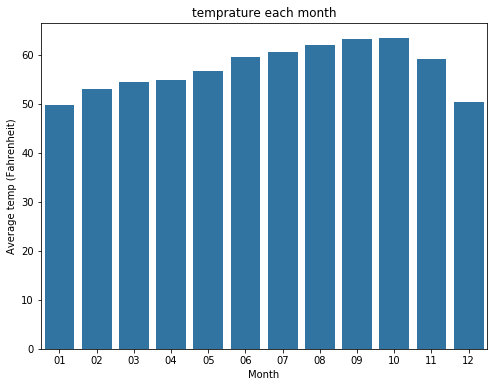

In [12]:
plt.figure(figsize=(8,6))
sns.barplot('MONTH', 'TAVG', data=df_weather, color=base_color);
plt.title('temprature each month')
plt.xlabel('Month')
plt.ylabel('Average temp (Fahrenheit)');

It seems there is a quite relation with weather temprature.

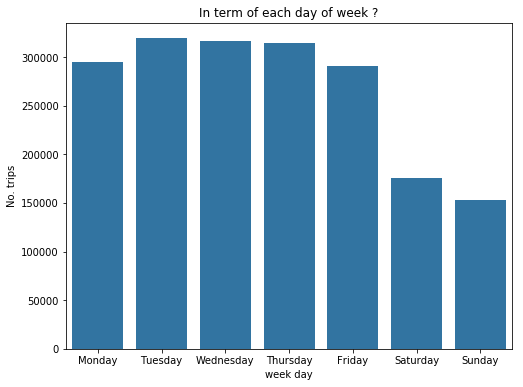

In [13]:
# setting figure size
plt.figure(figsize=(8,6))

# list for order of xlable
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(df.start_time.dt.day_name(), color=base_color, order=order);

# plotting title and lables
plt.title('In term of each day of week ?')
plt.xlabel('week day')
plt.ylabel('No. trips');

It is obvois that business days have higher peak than the weekend.

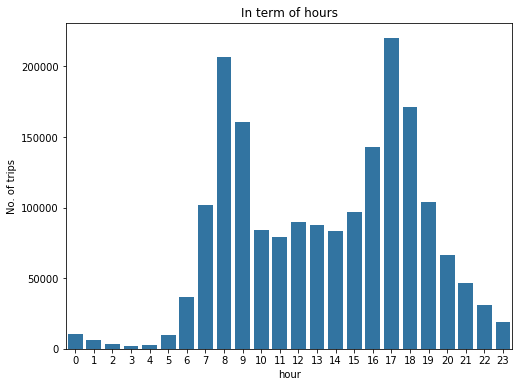

In [14]:
plt.figure(figsize=(8,6))
sns.countplot(df.start_time.dt.hour, color=base_color);
plt.title('In term of hours')
plt.xlabel('hour')
plt.ylabel('No. of trips');

The bar chart looks to be bimodel which has two spikes one from 8 to 9 and the other from 16 to 18. After descovering another bike share system before this spikes are expected. Since it follows work starts and ends. 

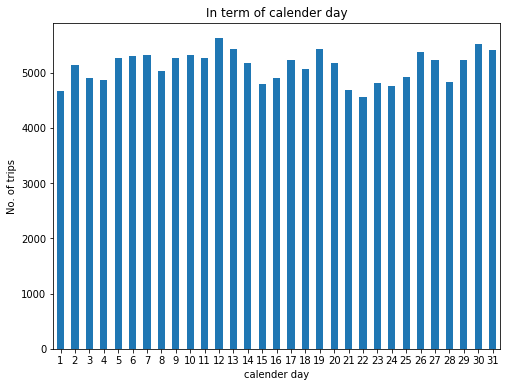

In [15]:
# setting the figure size
plt.figure(figsize=(8,6))

# create datetime object from start_time column to be the index
index = pd.DatetimeIndex(df.start_time)
df1 = df.reindex(index=index)

# group them by day
df1 = df1.resample('D').size()
df1.groupby(df1.index.day).mean().plot('bar', color=base_color)

# setting x ticks rotation to be 0
plt.xticks(rotation=0)

# plotting the title and lables
plt.title('In term of calender day')
plt.xlabel('calender day')
plt.ylabel('No. of trips');

The chart shows that there is no spike in the trips in term of calender day.

## How long does the average trip take?

In [16]:
df.duration_sec.mean() // 60

14.0

The average ride for all trips is 14 minutes.

## Does the above depend on if a user is a subscriber or customer?

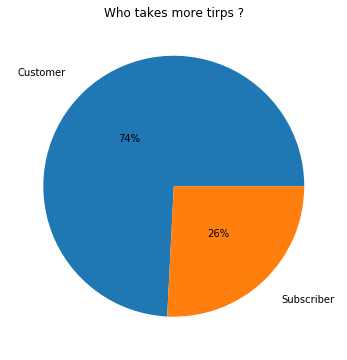

In [17]:
df.groupby('user_type').duration_sec.mean().plot('pie', autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2, figsize=(8,6))
plt.ylabel('')
plt.title('Who takes more tirps ?');

The majority of tripes has been taken by Non-subscribers. However the dataset doesn't contain members id which it would be helpfull to investigate customers's usage pattern. 

## Gender distripution ?

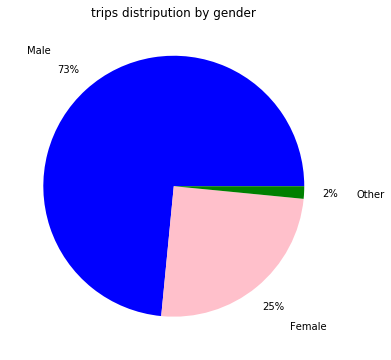

In [18]:
# setting colors for the plot
colors = ['blue', 'pink', 'green']

df.member_gender.value_counts().plot('pie', autopct='%1.0f%%', pctdistance=1.2, labeldistance=1.4, figsize=(8,6), colors=colors);
# wipe ylable and plotting title
plt.ylabel('')
plt.title('trips distripution by gender');

The majority of gender is male with 73%. The female perecentage is 25% 

## Average trip duration by gender

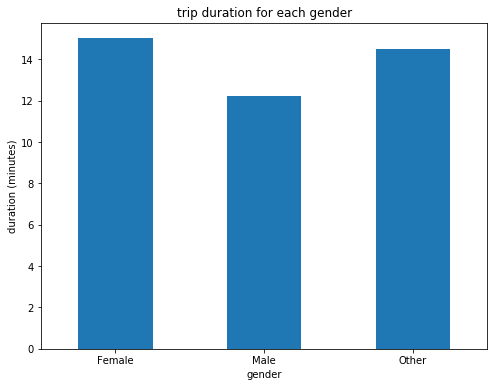

In [19]:
plt.figure(figsize=(8,6))
(df.groupby('member_gender').duration_sec.mean() / 60).plot('bar')
plt.xticks(rotation=0);
plt.title('trip duration for each gender')
plt.xlabel('gender')
plt.ylabel('duration (minutes)');

The average female trip takes about 15 minutes. On the other hand the average male gender takes around 12 minutes.<br>
The other gender takes around 14 minutes ,but since other gender is about 6% of the trips is less accurate than female and male gender.

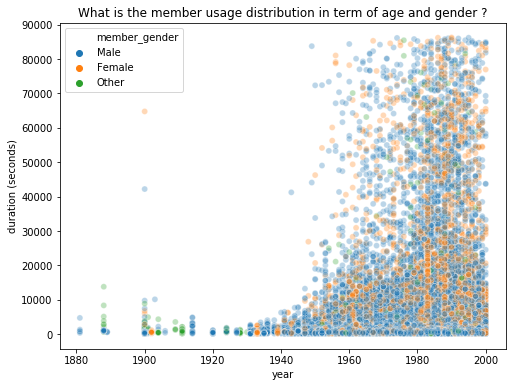

In [25]:
plt.figure(figsize=(8,6))
ticks = np.arange(0, df.duration_sec.max()+ 10000, 10000)
labels = ['{}'.format(v) for v in ticks]
sns.scatterplot('member_birth_year', 'duration_sec', hue='member_gender', data=df,alpha= 0.3)
plt.title('What is the member usage distribution in term of age and gender ?')
plt.xlabel('year')
plt.ylabel('duration (seconds)')
plt.yticks(ticks, labels);

this plot shows there is outlires on year 1900 and before. With 25% female trips it is quite abvois that they take longer trips that male.

##  most used bike

In [21]:
df.groupby('bike_id').duration_sec.sum().sort_values(ascending=False)[:10] //3600

bike_id
3961    330
3235    324
4452    294
1181    291
2970    288
2237    285
3570    283
3614    278
1298    273
2375    271
Name: duration_sec, dtype: int64

The most used bike used  for 330 hours followed by a bike use for 324 hours. Well let's see the bike's usage distribution.

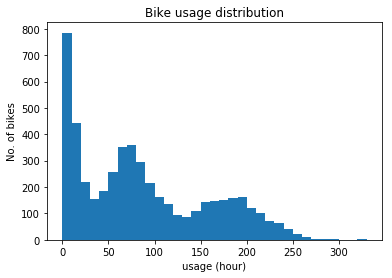

In [22]:
bins = np.arange(0, 330+10, 10)
(df.groupby('bike_id').duration_sec.sum() //3600).plot('hist', bins=bins);
plt.title('Bike usage distribution')
plt.ylabel('No. of bikes')
plt.xlabel('usage (hour)');

It looks that we have interesting distribution. some bikes are rarly used with about 10 to 20 hours of usage and we have another spike with about 70 to 90 hours and another spike with about 160 to 200 hours. 

# conclusion 
With 331 stations in San Francicso and over 1.86 million trips has been taken on 2008.The analysis shows that the bike share system is more active on business days than weekends. In terms of months there is a spike from May to Oct. We have seen some relation with weather Temprature. The analysis shows that Female take longer ride duration than male. We have seen how the bike usage distributed. 

# Done By Yousef Alamri

# Supervised by Udacity.com